Prepared by: Jude Michael Teves

## Preliminaries

### Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

sns.set_style('darkgrid')
# sns.color_palette('tab10')
sns.set_palette('Set2')
sns.color_palette('Set2')

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

### Load Dataset

We'll be using the Iris dataset for this exercise. The dataset contains 3 classes:
 - 0 - Iris-Setosa
 - 1 - Iris-Versicolour
 - 2 - Iris-Virginica

We will also be splitting the dataset into train and test sets.

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

X, y = datasets.load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Original Size | Input: {X.shape}, Output: {y.shape}")
print(f"Train Set Size | Input: {X_train.shape}, Output: {y_train.shape}")
print(f"Test Set Size | Input: {X_test.shape}, Output: {y_test.shape}")

Original Size | Input: (150, 4), Output: (150,)
Train Set Size | Input: (120, 4), Output: (120,)
Test Set Size | Input: (30, 4), Output: (30,)


### Visualize the data

In [ ]:
train_set = np.concatenate((X_train, y_train.reshape(-1,1)), axis=1)
df_train = pd.DataFrame(train_set, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target'])
df_train['target'] = df_train['target'].astype(int)

test_set = np.concatenate((X_test, y_test.reshape(-1,1)), axis=1)
df_test = pd.DataFrame(test_set, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target'])
df_test['target'] = df_test['target'].astype(int)

df_train.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,4.6,3.6,1.0,0.2,0
1,5.7,4.4,1.5,0.4,0
2,6.7,3.1,4.4,1.4,1
3,4.8,3.4,1.6,0.2,0
4,4.4,3.2,1.3,0.2,0


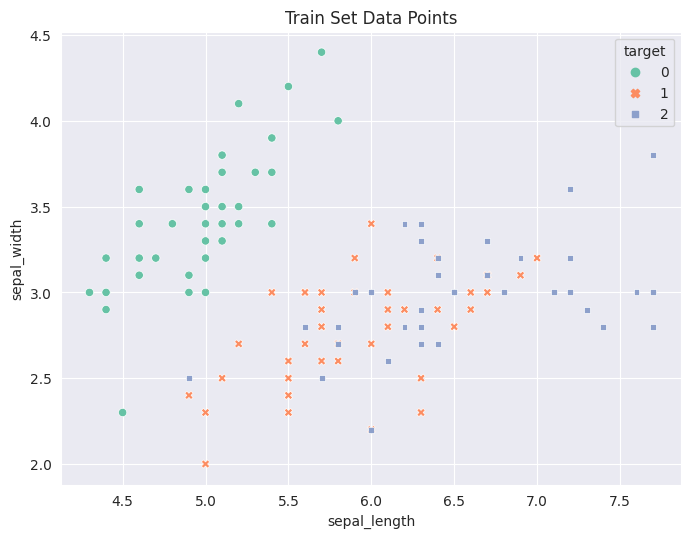

In [ ]:
plt.figure(figsize=(8,6), dpi=100)
# palette = sns.color_palette('Set2', n_colors=3, as_cmap=True)
sns.scatterplot(data=df_train, x='sepal_length', y='sepal_width', hue='target', style='target', palette="Set2")
plt.title('Train Set Data Points')
plt.show()

In [ ]:
# sns.color_palette('Set2', n_colors=3)
# sns.color_palette('Set2', n_colors=3, as_cmap=True)

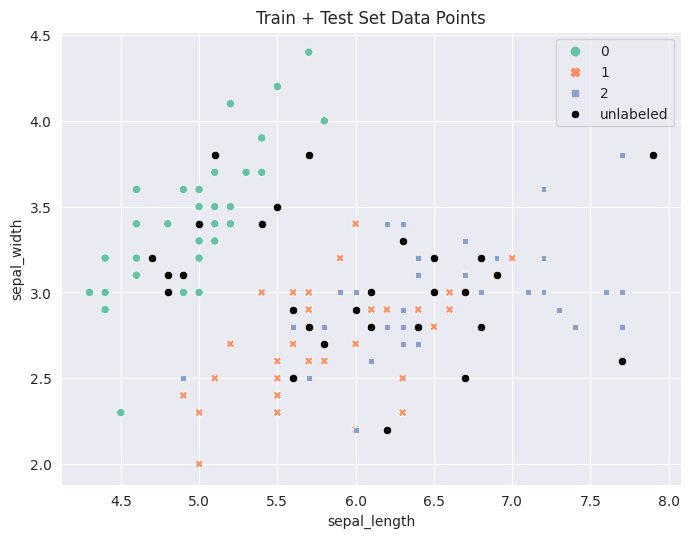

In [ ]:
plt.figure(figsize=(8,6), dpi=100)

sns.scatterplot(data=df_train, x='sepal_length', y='sepal_width', hue='target', style='target', palette="Set2")
sns.scatterplot(data=df_test, x='sepal_length', y='sepal_width', color='black', label='unlabeled')

plt.title('Train + Test Set Data Points')
plt.show()

## Exercise: Implement Distance Measurement

 - Implement Minkowski distance. 
 - Replace ```raise NotImplementedError``` with your code. 


For reference, here are the formulas for some distance measurements:

 - Manhattan Distance
$$Dist(\bar{X}, \bar{Y}) = \sum_i |x_i - y_i|$$

 - Euclidean Distance
$$Dist(\bar{X}, \bar{Y}) = \sqrt{\sum_i (x_i - y_i)^2}$$

 - Minkowski Distance
$$Dist(\bar{X}, \bar{Y}) = ({\sum_i |x_i - y_i|^p})^{1/p}$$

 



In [ ]:
def minkowski(X, point, p:int=2) -> list:
  '''
  Returns a list of distances of each elements in X from the reference point.
  '''
  # raise NotImplementedError
  d = lambda x: (((abs(x-point))**p).sum())**(1/p)
  distances = list(map(d, X))
  return distances

In [ ]:
pd.DataFrame(X_test).head()

,0,1,2,3
0,6.1,2.8,4.7,1.2
1,5.7,3.8,1.7,0.3
2,7.7,2.6,6.9,2.3
3,6.0,2.9,4.5,1.5
4,6.8,2.8,4.8,1.4


In [ ]:
X_test[0]

array([6.1, 2.8, 4.7, 1.2])

In [ ]:
pd.DataFrame(X_train).head()

,0,1,2,3
0,4.6,3.6,1.0,0.2
1,5.7,4.4,1.5,0.4
2,6.7,3.1,4.4,1.4
3,4.8,3.4,1.6,0.2
4,4.4,3.2,1.3,0.2


In [ ]:
X_train[:5]

array([[4.6, 3.6, 1. , 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [6.7, 3.1, 4.4, 1.4],
       [4.8, 3.4, 1.6, 0.2],
       [4.4, 3.2, 1.3, 0.2]])

In [ ]:
from numpy.testing import assert_almost_equal

point = X_test[0]
distances = minkowski(X_train, point)
assert_almost_equal(distances[:20], [4.192851058647326, 3.6878177829171555, 0.7615773105863913, 3.558089374931439, 3.950949253027682, 
                                     0.8426149773176357, 0.6164414002968983, 3.5411862419251547, 3.706750598570128, 3.7349698793966195, 
                                     0.8660254037844383, 0.7549834435270751, 0.734846922834954, 3.72827037646145, 3.5411862419251547, 
                                     1.2489995996796794, 0.5385164807134502, 1.0862780491200217, 0.648074069840786, 2.345207879911715])

In [ ]:
# using for loops and 'normal' function

def d(x): 
  return (((abs(x-point))**p).sum())**(1/p)

p=2
for x in X_train[:5]:
  print(d(x))

4.192851058647326
3.6878177829171555
0.7615773105863913
3.558089374931439
3.950949253027682


## Exercise: Get Nearest Neighbors

In [ ]:
def get_nearest_neighbors(X, point, k:int) -> list:
  '''
  Returns indices of nearest neighbors
  '''
  # raise NotImplementedError
  indices = list()
  values = list()
  distances = minkowski(X, point, k)
  for idx, value in enumerate(distances):
    values.append(value)

  values.sort()
  for i in values[:k]:
    indices.append(distances.index(i))

  return indices

In [ ]:
indices = get_nearest_neighbors(X, point, k=3)
assert indices == [73, 63, 91]

In [ ]:
indices

[73, 63, 91]

## Exercise: Classify!

In [ ]:
from collections import Counter

def classify(X, y, point, k:int):
  '''
  Returns the classification of a new data point
  '''
  # raise NotImplementedError
  ypoints = list()
  neighbors = get_nearest_neighbors(X, point, k)

  for i in neighbors[:k]:
    ypoints.append(y[i])

  label = max(set(ypoints), key=ypoints.count)

  return label

In [ ]:
assert classify(X_train, y_train, point, k=3) == 1

### Test if our predictions match the actual...

In [ ]:
y_pred = [classify(X_train, y_train, p, k=3) for p in X_test]
y_pred == y_test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [ ]:
print(f"Score: {sum(y_pred == y_test)/len(y_test):.2%}")

Score: 100.00%
